In [2]:
import matplotlib.pyplot as plt
import numpy as np
from proj1_helpers import *
from implement import *


DATA_FOLDER = 'data'
DATA_TRAIN_PATH = '../data/train.csv'


y, tX, ids = load_csv_data(DATA_TRAIN_PATH)



In [3]:
ind_DER_mass_MMC = 0
ind_DER_mass_transverse_met_lep = 1
ind_DER_mass_vis = 2
ind_DER_pt_h   = 3
ind_DER_deltaeta_jet_jet = 4
ind_DER_mass_jet_jet = 5
ind_DER_prodeta_jet_jet = 6
ind_DER_deltar_tau_lep = 7
ind_DER_pt_tot   = 8
ind_DER_sum_pt   = 9
ind_DER_pt_ratio_lep_tau   = 10
ind_DER_met_phi_centrality   = 11
ind_DER_lep_eta_centrality   = 12
ind_PRI_tau_pt   = 13
ind_PRI_tau_eta   = 14
ind_PRI_tau_phi   = 15
ind_PRI_lep_pt   = 16
ind_PRI_lep_eta = 17
ind_PRI_lep_phi = 18
ind_PRI_met   = 19
ind_PRI_met_phi   = 20
ind_PRI_met_sumet   = 21
ind_PRI_jet_num   = 22
ind_PRI_jet_leading_pt   = 23
ind_PRI_jet_leading_eta   = 24
ind_PRI_jet_leading_phi   = 25
ind_PRI_jet_subleading_pt   = 26
ind_PRI_jet_subleading_eta   = 27
ind_PRI_jet_subleading_phi   = 28
ind_PRI_jet_all_pt   = 29



Step 1 : Correct the values for jet_num = 2 // All the values in DER_mass_MMC = -999.000
We correct them by extracting the correct values in this column (which is DER_mass_MMC)
And train a model to predict the value of this column using the values from the other parameters

DER_mass_MMC  : 7562  nb -999.000 values

Task 1 from this step : Extract and store in proper way, in order to have a 
- 'y' vector containing the right values of DER_mass_MMC
- 'x' matrix containing the others columns from the right values of DER_mass_MMC (associated to y)
- 'wrongX_topredict' containing the parameters from the wrong values of DER_mass_MMC 

We will then train the model using y and x, and then compute this trained model with wrongX_topredict in order to have some approx. correct values and replace all the -999.000


We need to remove :
- DER_deltaeta_jet_jet : 77544/77544 wrong 
- DER_mass_jet_jet  : 77544/77544
- DER_prodeta_jet_jet  : 77544/77544
- DER_lep_eta_centrality  : 77544/77544 wrong 

- PRI_jet_subleading_pt  : 77544/77544 wrong 
- PRI_jet_subleading_eta  : 77544/77544 wrong 
- PRI_jet_subleading_phi  : 77544/77544 wrong 

In [21]:
# Extract indices from dataset only jet_num = 3 // ravel() is used to transform into a single vector the indices
ind_jet1 = np.argwhere((tX[:,ind_PRI_jet_num] == 1)).ravel()

# Create new dataset extracting only jet_num = 3
datajet1 = tX[ind_jet1]
colToDelete = [ind_PRI_jet_num,ind_DER_deltaeta_jet_jet, ind_DER_mass_jet_jet, ind_DER_prodeta_jet_jet, ind_DER_lep_eta_centrality, ind_PRI_jet_subleading_pt, ind_PRI_jet_subleading_eta, ind_PRI_jet_subleading_phi, ind_PRI_jet_all_pt ]     
datajet1 = np.delete(datajet1, colToDelete , axis=1)
print(datajet1.min(axis=0))
# Now we want to extract and correct -999.000 values from DER_mass_MMC

print("Length of Jet_num = 1 : " +str(datajet1[:,ind_DER_mass_MMC].shape))

# Extract indices where the wrong value of DER_mass_MMC == -999.000 // We want to correct/predict these values
ind_wrongjet1 = np.argwhere(datajet1[:,ind_DER_mass_MMC] == -999.000).ravel()
print(ind_wrongjet1)

# Extract indices where the values of DER_mass_MMC are correct // We will train from these datas
ind_rightjet1 = np.argwhere(datajet1[:,ind_DER_mass_MMC] != -999.000).ravel()
print(ind_rightjet1)

# Extract data DER_mass_MMC only wrong values
wrongjet1 = datajet1[ind_wrongjet1]
print(wrongjet1.shape)

#Create the data that will compute the predicted y (DER_mass_MMC)
tx_wrongjet1 = np.delete(wrongjet1, ind_DER_mass_MMC, axis=1)
print(tx_wrongjet1.shape)


# Extract data DER_mass_MMC only correct values
rightjet1 = datajet1[ind_rightjet1]
print(rightjet1.shape)
#Now we'll extract the DER_mass_MMC column and turn it into a 'y' vector sample,
# The others columns will be the 'X' data samples
y_rightjet1 = rightjet1[:, ind_DER_mass_MMC]
print(y_rightjet1.shape)
tx_rightjet1 = np.delete(rightjet1, ind_DER_mass_MMC, axis=1)
print(tx_rightjet1.shape)

[-9.9900e+02  0.0000e+00  6.3290e+00  0.0000e+00  2.0800e-01  0.0000e+00
  7.7017e+01  8.3000e-02 -1.4140e+00  2.0000e+01 -2.4980e+00 -3.1410e+00
  2.6000e+01 -2.4940e+00 -3.1420e+00  2.5100e-01 -3.1410e+00  2.1066e+01
  3.0000e+01 -4.4990e+00 -3.1420e+00]
Length of Jet_num = 1 : (77544,)
[    1     8    17 ... 77529 77531 77541]
[    0     2     3 ... 77540 77542 77543]
(7562, 21)
(7562, 20)
(69982, 21)
(69982,)
(69982, 20)


Now that we have the data we will train the model

In [22]:
from implement import *
from cross_validation import *
import matplotlib.pyplot as plt

In [23]:
#best_degree_selection(y_rightjet3,tx_rightjet3, np.arange(1,11), 5, np.logspace(-4, 0, 30), seed = 2)

# Best degree : 2 / Best lambda : 0.00013738237958832623

0.03310674254625888
[160.937 154.916 128.053 ...  89.509 133.457 105.457]
[ 0.96117874  0.20421243  0.61715422 ... -0.17147893  0.27888928
 -0.25663758]


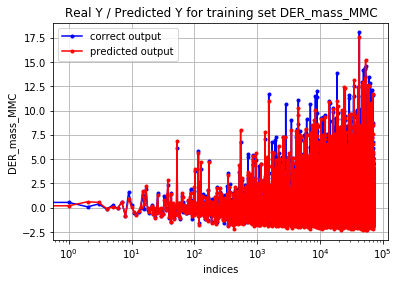

In [42]:
tx_rightjet1_poly = build_poly(tx_rightjet1, 3, True)
tx_rightjet1_poly,mean_txjet1,std_txjet1 = standardize(tx_rightjet1_poly)

stand_y_rightjet1,mean_yjet1,std_yjet1 = standardize(y_rightjet1)

loss, w_jet1 = ridge_regression(stand_y_rightjet1, tx_rightjet1_poly, 0.00001)
print(loss)


y_pred = tx_rightjet1_poly.dot(w_jet1)
print(y_rightjet1)
print(y_pred)


plt.semilogx(np.arange(y_pred.shape[0]), stand_y_rightjet1, marker=".", color='b', label='correct output')
plt.semilogx(np.arange(y_pred.shape[0]), y_pred, marker=".", color='r', label='predicted output')
plt.xlabel("indices")
plt.ylabel("DER_mass_MMC")
plt.title("Real Y / Predicted Y for training set DER_mass_MMC")
plt.legend(loc=2)
plt.grid(True)



In [43]:
#cross_validation_demo(y_rightjet1,tx_rightjet1_poly, 2, 5)

The model is trained so we will now compute/predict the values for the wrong ones.

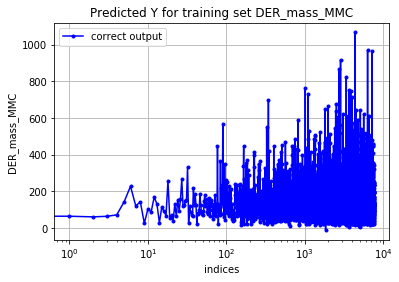

In [49]:
tx_wrongjet1_poly = build_poly(tx_wrongjet1, 3, True)
tx_wrongjet1_poly,_,_ = standardize(tx_wrongjet1_poly, mean_txjet1, std_txjet1)

y_pred = tx_wrongjet1_poly.dot(w_jet1)
y_pred = (y_pred*std_yjet1) + mean_yjet1

plt.semilogx(np.arange(y_pred.shape[0]), y_pred, marker=".", color='b', label='correct output')
plt.xlabel("indices")
plt.ylabel("DER_mass_MMC")
plt.title("Predicted Y for training set DER_mass_MMC")
plt.legend(loc=2)
plt.grid(True)

We will now correct the initial dataset.

In [50]:
wrongjet1[:, ind_DER_mass_MMC] = y_pred

datajet1[ind_wrongjet1] = wrongjet1

datajet1.min(axis=0)

array([-11.37542955,   0.        ,   6.329     ,   0.        ,
         0.208     ,   0.        ,  77.017     ,   0.083     ,
        -1.414     ,  20.        ,  -2.498     ,  -3.141     ,
        26.        ,  -2.494     ,  -3.142     ,   0.251     ,
        -3.141     ,  21.066     ,  30.        ,  -4.499     ,
        -3.142     ])

In [51]:
print(datajet1.shape)
print(y.shape)

y_jet1 = y[ind_jet1]
print(y_jet1.shape)

#cross_validation_demo(y_jet1,datajet1, 2, 5)

(77544, 21)
(250000,)
(77544,)


In [56]:
datajet1_poly = build_poly(datajet1, 8, True)


loss, w_pred_jet1 = ridge_regression(y_jet1, datajet1_poly, 0.00001)
print(loss)

0.3028497300939623


In [57]:
y_pred = predict_labels(w_pred_jet1, datajet1_poly)
y_pred

result = np.sum(y_pred == y_jet1)

print("Final result : " + str(result/y_jet1.shape[0]))

Final result : 0.7967992365624678
